In [1]:
# import pandas as pd
import pandas as pd
import matplotlib as plt
import seaborn as sns
# the rank column could be used as index so read the dataset again and use the rank column as index using index_col parameter
fortune=pd.read_csv("fortune1000.csv",index_col="Rank").dropna(how='all').drop_duplicates()
fortune.head()

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [2]:
fortune.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Company    996 non-null    object
 1   Sector     996 non-null    object
 2   Industry   996 non-null    object
 3   Location   996 non-null    object
 4   Revenue    996 non-null    int64 
 5   Profits    996 non-null    int64 
 6   Employees  996 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 62.2+ KB


##### as we see above the data set is ready for investigations we no needed any casting 

# the goal of this notebook is to answer the following question?

- what is the most successful sector,industry because i'm going to trade in the stock market?
to answer this question we can solve this question by many ways as ?
- find the mean profit for each sector and choose the sector with the highest profit.
- the number of componies related to each sector in this data.

In [3]:
# choose which column is more suitable for the study
fortune.nunique()

Company      996
Sector        21
Industry      73
Location     416
Revenue      945
Profits      760
Employees    755
dtype: int64

######   - may be the best columns to choose is the sector and profit.

In [4]:
##first let's explor the counts of the Sectors
fortune['Sector'].value_counts().sort_values(ascending=False)

Sector
Financials                      137
Energy                          120
Technology                      102
Retailing                        80
Health Care                      75
Business Services                51
Industrials                      46
Materials                        43
Food, Beverages & Tobacco        43
Wholesalers                      40
Transportation                   36
Chemicals                        30
Household Products               28
Engineering & Construction       26
Media                            25
Hotels, Resturants & Leisure     25
Motor Vehicles & Parts           24
Aerospace & Defense              20
Telecommunications               15
Apparel                          15
Food and Drug Stores             15
Name: count, dtype: int64

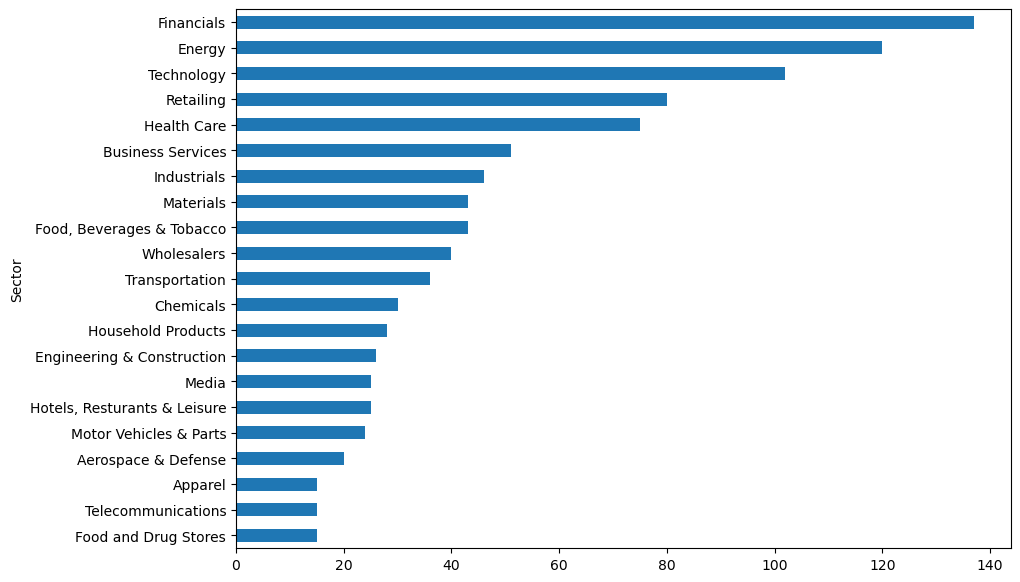

In [5]:
fortune['Sector'].value_counts().sort_values().plot(kind='barh',figsize=(10,7));

In [6]:
#second let's see the total revenue for each sectores
fortune.groupby('Sector')['Revenue'].sum().sort_values(ascending=False)

Sector
Financials                      2206098
Health Care                     1614707
Energy                          1512778
Retailing                       1465076
Technology                      1377600
Food, Beverages & Tobacco        555967
Industrials                      497581
Food and Drug Stores             483769
Motor Vehicles & Parts           482540
Telecommunications               461834
Wholesalers                      444800
Transportation                   408508
Aerospace & Defense              357940
Business Services                272195
Materials                        259145
Chemicals                        243897
Household Products               234737
Media                            220764
Hotels, Resturants & Leisure     169546
Engineering & Construction       153983
Apparel                           95968
Name: Revenue, dtype: int64

In [7]:
# find approx. market share for each sectors
round(fortune.groupby('Sector')['Revenue'].sum()/fortune.groupby('Sector')['Revenue'].sum().sum(),2).sort_values(ascending=False)*100

Sector
Financials                      16.0
Health Care                     12.0
Energy                          11.0
Retailing                       11.0
Technology                      10.0
Industrials                      4.0
Food and Drug Stores             4.0
Food, Beverages & Tobacco        4.0
Motor Vehicles & Parts           4.0
Aerospace & Defense              3.0
Transportation                   3.0
Telecommunications               3.0
Wholesalers                      3.0
Materials                        2.0
Media                            2.0
Household Products               2.0
Chemicals                        2.0
Business Services                2.0
Apparel                          1.0
Engineering & Construction       1.0
Hotels, Resturants & Leisure     1.0
Name: Revenue, dtype: float64

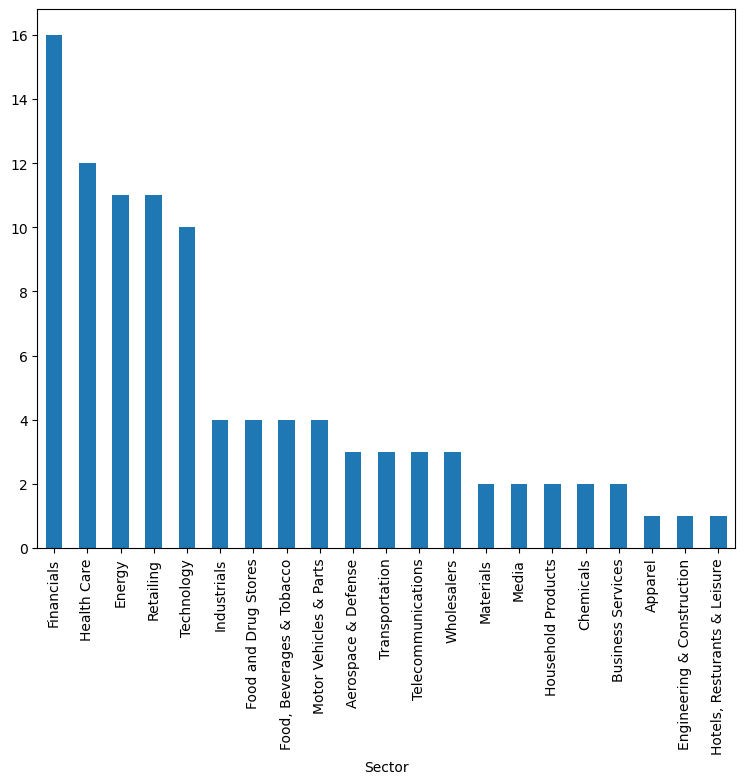

In [8]:
(round(fortune.groupby('Sector')['Revenue'].sum()/fortune.groupby('Sector')['Revenue'].sum().sum(),2).sort_values(ascending=False)*100).plot(kind='bar',figsize=(9,7));

In [9]:
# find the maximum profit in each sector  , also try  min,sum,max,mean
fortune.groupby('Sector').agg({'Profits':['sum','min','max','mean','std'],
            'Revenue':['mean','std']}).sort_values(('Profits','sum'),ascending=False)

Profits                                          \
                                 sum    min    max         mean          std   
Sector                                                                         
Financials                    258589  -1194  24442  1887.510949  4136.786733   
Technology                    180473  -4359  53394  1769.343137  5955.766651   
Health Care                   106114   -458  18108  1414.853333  3025.285364   
Food, Beverages & Tobacco      51417   -253   7351  1195.744186  2032.684843   
Telecommunications             48637   -271  17879  3242.466667  5517.519394   
Retailing                      47830  -1243  14694   597.875000  1896.931188   
Transportation                 44169   -191   7610  1226.916667  2005.153081   
Aerospace & Defense            28742   -240   7608  1437.100000  2026.281788   
Business Services              28227  -1481   6328   553.470588  1058.517026   
Motor Vehicles & Parts         25898   -889   9687  1079.083333  2404.801825   
Media                          24347   -881   8382   973.880000  2413.073547   
Chemicals                      22628   -816   7685   754.266667  1481.756552   
Industrials                    20764  -6126   4833   451.391304  1501.766522   
Hotels, Resturants & Leisure   20697  -1394   5920   827.880000  1554.535657   
Food and Drug Stores           16759    -62   5237  1117.266667  1677.128944   
Household Products             14428  -1149   7036   515.285714  1368.085601   
Apparel                         8236     82   3273   549.066667   810.479441   
Wholesalers                     8233   -502   1472   205.825000   308.448299   
Engineering & Construction      5304   -155    803   204.000000   229.344283   
Materials                       4428  -1642    991   102.976744   408.060832   
Energy                        -71178 -23119  16150  -593.150000  3900.959894   

                                   Revenue                
                                      mean           std  
Sector                                                    
Financials                    16102.905109  27274.819773  
Technology                    13505.882353  30169.473168  
Health Care                   21529.426667  35680.266614  
Food, Beverages & Tobacco     12929.465116  15732.585231  
Telecommunications            30788.933333  47551.639576  
Retailing                     18313.450000  55751.002620  
Transportation                11347.444444  14740.409538  
Aerospace & Defense           17897.000000  24468.237017  
Business Services              5337.156863   4102.377498  
Motor Vehicles & Parts        20105.833333  41174.300379  
Media                          8830.560000  11685.332576  
Chemicals                      8129.900000   9575.323185  
Industrials                   10816.978261  22070.679715  
Hotels, Resturants & Leisure   6781.840000   6012.189110  
Food and Drug Stores          32251.266667  48595.512604  
Household Products             8383.464286  14416.609895  
Apparel                        6397.866667   7254.770616  
Wholesalers                   11120.000000  11049.255712  
Engineering & Construction     5922.423077   4579.682742  
Materials                      6026.627907   4698.190148  
Energy                        12606.483333  27560.697937

In [10]:
fortune.groupby('Sector')['Profits'].sum().sort_values(ascending=False)

Sector
Financials                      258589
Technology                      180473
Health Care                     106114
Food, Beverages & Tobacco        51417
Telecommunications               48637
Retailing                        47830
Transportation                   44169
Aerospace & Defense              28742
Business Services                28227
Motor Vehicles & Parts           25898
Media                            24347
Chemicals                        22628
Industrials                      20764
Hotels, Resturants & Leisure     20697
Food and Drug Stores             16759
Household Products               14428
Apparel                           8236
Wholesalers                       8233
Engineering & Construction        5304
Materials                         4428
Energy                          -71178
Name: Profits, dtype: int64

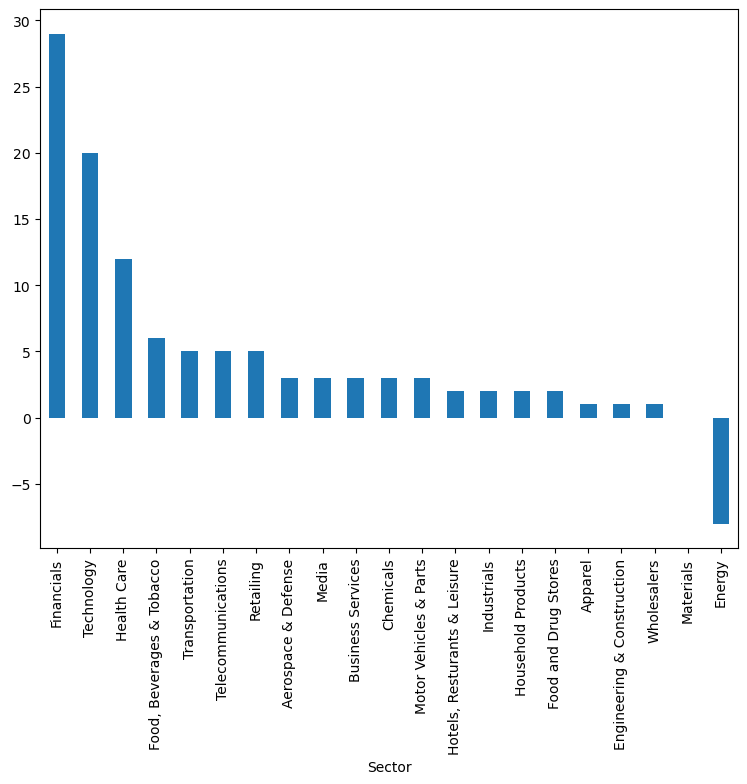

In [11]:
(round(fortune.groupby('Sector')['Profits'].sum()/fortune.groupby('Sector')['Profits'].sum().sum(),2).sort_values(ascending=False)*100).plot(kind='bar',figsize=(9,7));

In [12]:
fortune.groupby('Sector')['Profits'].median().sort_values(ascending=False)

Sector
Telecommunications              747.0
Financials                      583.0
Aerospace & Defense             566.5
Food, Beverages & Tobacco       498.0
Transportation                  392.0
Technology                      373.0
Chemicals                       367.5
Health Care                     346.0
Business Services               296.0
Household Products              274.0
Motor Vehicles & Parts          233.0
Apparel                         233.0
Industrials                     215.0
Energy                          196.5
Hotels, Resturants & Leisure    195.0
Food and Drug Stores            192.0
Retailing                       182.0
Media                           151.0
Engineering & Construction      150.5
Materials                       142.0
Wholesalers                     128.0
Name: Profits, dtype: float64

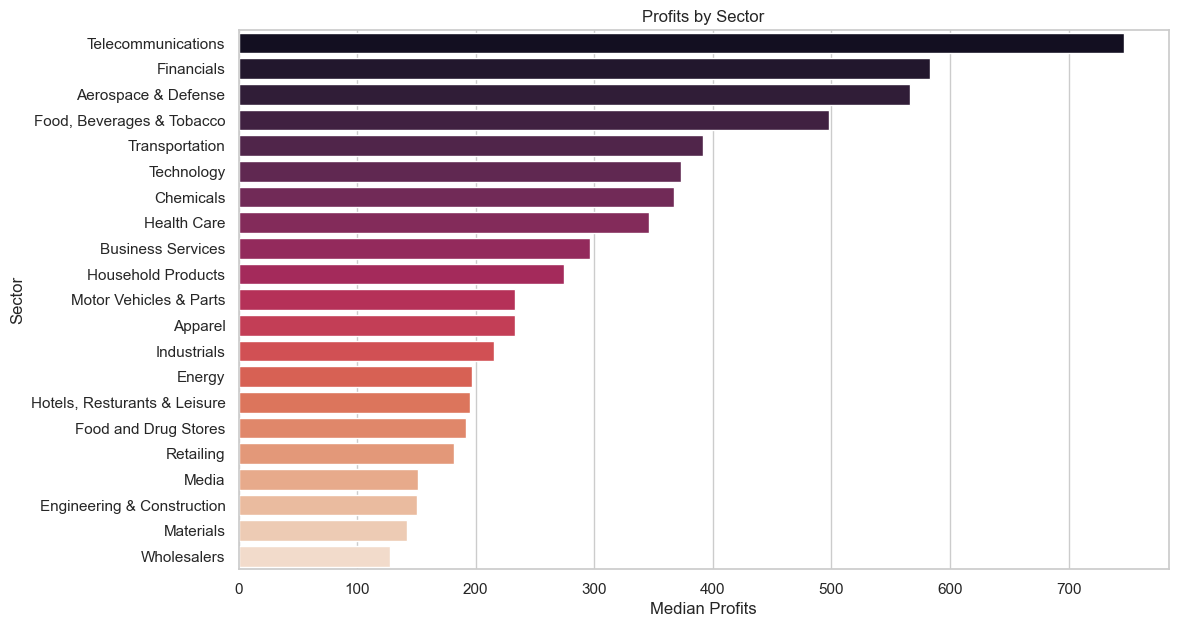

In [27]:
import matplotlib.pyplot as plt
# Assuming fortune is a pandas dataframe with columns 'Sector' and 'Profits'
median_profits = fortune.groupby('Sector')['Profits'].median().sort_values(ascending = False)

# Set the style and context of the plot
sns.set_style('whitegrid')
sns.set_context('notebook')
fig, ax = plt.subplots(figsize=(12, 7))
# Create the bar plot using seaborn
sns.barplot(x=median_profits.values, y=median_profits.index, palette='rocket', ax=ax)

# Add labels and title
plt.xlabel('Median Profits')
plt.ylabel('Sector')
plt.title('Profits by Sector')

# Show the plot
plt.show()

### Based on the above diagrams, we found the following:
- The financial sector has 137 successful companies, which is the highest number of companies among the others.
- Also, based on revenue and profit, I found that the financial sector is one of the top sectors.
- Based on that, I think the financial sector is the best choice to invest in compared to other sectors, but make sure to choose the right company to invest in because, as we showed, the standard deviation is 4136.78, which means that there is a lot of variation in profit among the companies